# It's time to work with the Iris Data

In [2]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
X = iris.data 
y = iris.target


#### What is the size of our feature space?

In [4]:
X.shape

(150, 4)

Answer: 150 rows, 4 columns

#### How many categories does Iris data have? How many observations?

Answer: 

#### Use two principal components and visualize your categories based on these two components. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors, metrics

%matplotlib inline


In [6]:
clf = PCA(2)  #use enough principle components to capture 99% of variability. if you put #>1, instead of decimal it
#gives you the number of principal components
X_trans = clf.fit_transform(X)
X_trans.shape

(150, 2)

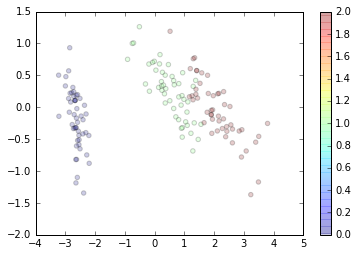

In [7]:
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, alpha=0.2)
plt.colorbar()

#### Based on what you visualized, does it look like that we your categories can be seperated using a classification algorithm?

Answer: It does

#### Draw a graph for percentage of Variance explained. 

In [9]:
misclass = []

for i in range(1,4):
    clf = PCA(i)
    X_trans = clf.fit_transform(X)
    knn = neighbors.KNeighborsClassifier(n_neighbors = 1, weights='uniform')
    knn.fit(X_trans,y)
    MisClassificationError = 1 - (cross_val_score(knn, X_trans, y, cv=10).mean())
    misclass.append(MisClassificationError)
    
print(min(misclass))

0.04


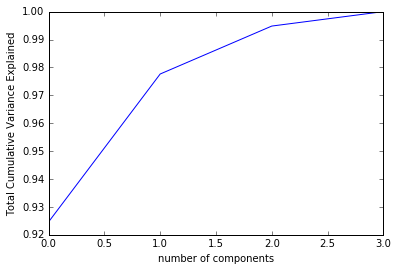

In [10]:
AllPCAs = PCA().fit(X)

plt.xlabel('number of components')
plt.ylabel('Total Cumulative Variance Explained')
plt.plot(np.cumsum(AllPCAs.explained_variance_ratio_))
plt.show()

#### Based on your graph how many Principal components can capture orme than 97% of variability in your data?

Answer: One

#### Use the number you mentioned above and transform your X variable by those many Principal Components. Once you do so, use a KNN algorithm and tune it to get the minimum misclassification error.